# Gráfico de Linea
Gráfico que presenta valores numéricos conectados por lineas de izquierda a derecha. Tiene un objetivo similar al gráfico de barras. Nos sirve para mostrar diferencias de variables numéricas a través de mi variable en el Eje X. Sin embargo, es más útil cuando queremos mostrar tendencias de subida o de bajada de mi variable numérica. A diferencia del grafico de barras, el Eje X de izquierda a derecha suele representar una unidad de progresión ordenada de menor a mayor (ejemplo: días, años, meses, horas; es decir, usualmente unidades de tiempo). Es decir, Variables categóricas ordinales. A diferencia del gráfico de barras, yo puedo tener muchas categorías o puntos en el Eje X ya que no necesito dibujar barras en cada punto. El gráfico puede tener varias líneas que representan diferentes grupos. En este caso se denomina gráfico multilinea. Y obviamente, cada línea tiene que estar correctamente diferenciada.    
**Eje X**: Variable categórica ordinal     
**Eje Y**: Variable numérica     
**Otros nombres**: Cuando mi cantidad de valores en el Eje X es muy alta y es una variable temporal, se puede denominar Serie de Tiempo.

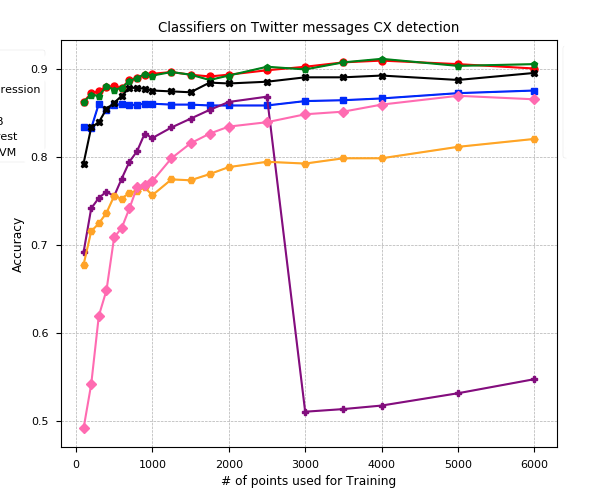

### Cuando utilizar
- Analizar tendencias de subida o de bajada en mis variables.
- Comparar diferencias de variables numéricas entre uno o más grupos en mis datos.
- Quiero visualizar cambios en magnitud a lo largo de mi Eje X. Sin embargo, si tengo pocos puntos, un gráfico de barras es mejor alternativa si este es mi único objetivo.


### Cuando no utilizar
- Si mi variable en el Eje X no tiene una progresión. En ese caso, tendría que pensar en un Gráfico de Barras.
- Si tengo menos de 3 puntos para graficar.
- Si quiero comparar proporciones.
- Si quiero obtener información sobre distribuciones.


### Ejemplos de Uso   
- Si soy dueño de una página web, me gustaría saber como ha cambiado el número de visitas entre diferentes años
- En un banco, me interesaría saber cuantas transacciones ocurren mensualmente


### Consejos
- No es necesario que el eje Y empiece en el valor del "cero" (a diferencia de los graficos de barras). He ahi la razón por la que no es tan útil como el diagrama de barras para comparar magnitudes.
- No interpoles o suavices la curva. Esto podría dar una falsa ilusión de valores inexistentes. Siempre une cada punto por una línea recta.
- Si no hay una cantidad grande de puntos, añade una clave visual para identificar correctamente a que parte de la línea pertenece cada punto (un triangulo, un cuadrado, un circulo, una equis, etc).
- No utilices colores innecesariamente.
- Si vas a hacer un Gráfico Multilinea para codificar una variable categórica adicional: 
  - Procura que no existan muchas lineas.
  - Procura que las variables que cada linea representan sean diferenciables (por ejemplo, a traves de colores diferentes, o a través de una forma diferente en los puntos)


## En esta clase
### Datos
Información sobre ventas de varios supermercados de una cadena
### Objetivos
1. Cómo ha cambiado la venta de mis productos por mes y por año?
2. En el año 2015, como se comparan las ventas de tres familias de productos diferentes a lo largo del tiempo? (SEAFOOD, DAIRY, MEATS)

## Referencias
- https://datavizcatalogue.com/ES/metodos/grafica_de_linea.html
- https://chartio.com/learn/charts/line-chart-complete-guide/

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Algunos ambientes van a necesitar este modo para poder visualizar los graficos de Plotly
import plotly
plotly.offline.init_notebook_mode(connected=True)

In [18]:
# Leemos los datos con Pandas
df = pd.read_csv('../data/tienda_ventas.csv')
df

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.00000,0
1,1,2013-01-01,1,BABY CARE,0.00000,0
2,2,2013-01-01,1,BEAUTY,0.00000,0
3,3,2013-01-01,1,BEVERAGES,0.00000,0
4,4,2013-01-01,1,BOOKS,0.00000,0
...,...,...,...,...,...,...
2161561,2161561,2016-04-30,9,POULTRY,826.35300,0
2161562,2161562,2016-04-30,9,PREPARED FOODS,165.65399,0
2161563,2161563,2016-04-30,9,PRODUCE,2012.72700,1
2161564,2161564,2016-04-30,9,SCHOOL AND OFFICE SUPPLIES,10.00000,0


In [19]:
# Nueva columna con el formato: YYYY-MM
df['fecha'] = df['date'].apply(lambda x: x[:7])
df

,id,date,store_nbr,family,sales,onpromotion,fecha
0,0,2013-01-01,1,AUTOMOTIVE,0.00000,0,2013-01
1,1,2013-01-01,1,BABY CARE,0.00000,0,2013-01
2,2,2013-01-01,1,BEAUTY,0.00000,0,2013-01
3,3,2013-01-01,1,BEVERAGES,0.00000,0,2013-01
4,4,2013-01-01,1,BOOKS,0.00000,0,2013-01
...,...,...,...,...,...,...,...
2161561,2161561,2016-04-30,9,POULTRY,826.35300,0,2016-04
2161562,2161562,2016-04-30,9,PREPARED FOODS,165.65399,0,2016-04
2161563,2161563,2016-04-30,9,PRODUCE,2012.72700,1,2016-04
2161564,2161564,2016-04-30,9,SCHOOL AND OFFICE SUPPLIES,10.00000,0,2016-04


In [20]:
# Ventas por mes en todas las tiendas tomando en cuenta todos los productos
por_mes = df[['fecha', 'sales']].groupby('fecha').sum()
por_mes

,sales
fecha,
2013-01,1.032762e+07
2013-02,9.658960e+06
2013-03,1.142850e+07
2013-04,1.099346e+07
2013-05,1.159770e+07
2013-06,1.168934e+07
2013-07,1.125740e+07
2013-08,1.173779e+07
2013-09,1.179293e+07


Text(0.5, 1.0, 'Ventas por mes por año')

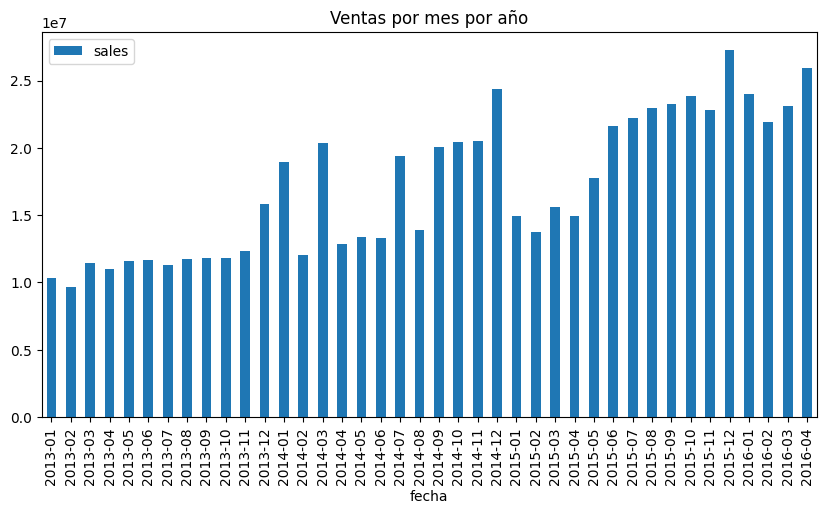

In [21]:
# Grafico de Lineas con Pandas
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.line.html
por_mes.plot.bar(
    y='sales', 
    #style='.-',
    figsize=(10, 5)
)
plt.title('Ventas por mes por año')

In [22]:
import plotly.express as px
fig = px.line(
    por_mes,
    x=por_mes.index.values,
    y='sales'
)
fig.show()

In [23]:
df['anio'] = df['date'].apply(lambda x: x[:4])
df

,id,date,store_nbr,family,sales,onpromotion,fecha,anio
0,0,2013-01-01,1,AUTOMOTIVE,0.00000,0,2013-01,2013
1,1,2013-01-01,1,BABY CARE,0.00000,0,2013-01,2013
2,2,2013-01-01,1,BEAUTY,0.00000,0,2013-01,2013
3,3,2013-01-01,1,BEVERAGES,0.00000,0,2013-01,2013
4,4,2013-01-01,1,BOOKS,0.00000,0,2013-01,2013
...,...,...,...,...,...,...,...,...
2161561,2161561,2016-04-30,9,POULTRY,826.35300,0,2016-04,2016
2161562,2161562,2016-04-30,9,PREPARED FOODS,165.65399,0,2016-04,2016
2161563,2161563,2016-04-30,9,PRODUCE,2012.72700,1,2016-04,2016
2161564,2161564,2016-04-30,9,SCHOOL AND OFFICE SUPPLIES,10.00000,0,2016-04,2016


In [24]:
# Filtro 2015 y las familias de productos que me interesan
df_2015 = df[
    (df['anio'] == '2015') & 
    (df['family'].isin(['SEAFOOD', 'MEATS', 'DAIRY']))
]
df_2015

,id,date,store_nbr,family,sales,onpromotion,fecha,anio
1297304,1297304,2015-01-01,1,DAIRY,0.000,0,2015-01,2015
1297320,1297320,2015-01-01,1,MEATS,0.000,0,2015-01,2015
1297328,1297328,2015-01-01,1,SEAFOOD,0.000,0,2015-01,2015
1297337,1297337,2015-01-01,10,DAIRY,0.000,0,2015-01,2015
1297353,1297353,2015-01-01,10,MEATS,0.000,0,2015-01,2015
...,...,...,...,...,...,...,...,...
1945902,1945902,2015-12-31,8,MEATS,382.466,0,2015-12,2015
1945910,1945910,2015-12-31,8,SEAFOOD,21.428,0,2015-12,2015
1945919,1945919,2015-12-31,9,DAIRY,878.000,1,2015-12,2015
1945935,1945935,2015-12-31,9,MEATS,377.211,21,2015-12,2015


In [25]:
# Agrupo por mes y por familia
agrupacion = df_2015[['fecha', 'family', 'sales']].groupby(['fecha', 'family']).sum()
agrupacion

sales
fecha   family               
2015-01 DAIRY    1.134521e+06
        MEATS    5.431177e+05
        SEAFOOD  4.046584e+04
2015-02 DAIRY    1.020747e+06
        MEATS    4.987351e+05
        SEAFOOD  3.606656e+04
2015-03 DAIRY    1.234851e+06
        MEATS    5.465172e+05
        SEAFOOD  4.380847e+04
2015-04 DAIRY    1.181180e+06
        MEATS    5.223043e+05
        SEAFOOD  3.998347e+04
2015-05 DAIRY    1.293308e+06
        MEATS    5.916919e+05
        SEAFOOD  4.250683e+04
2015-06 DAIRY    1.243588e+06
        MEATS    5.650141e+05
        SEAFOOD  3.878055e+04
2015-07 DAIRY    1.244815e+06
        MEATS    5.949037e+05
        SEAFOOD  3.853559e+04
2015-08 DAIRY    1.263428e+06
        MEATS    5.812141e+05
        SEAFOOD  3.776758e+04
2015-09 DAIRY    1.224619e+06
        MEATS    5.627116e+05
        SEAFOOD  4.190637e+04
2015-10 DAIRY    1.314827e+06
        MEATS    5.807884e+05
        SEAFOOD  4.142396e+04
2015-11 DAIRY    1.283672e+06
        MEATS    5.359089e+05
        SEAFOOD  3.882376e+04
2015-12 DAIRY    1.394582e+06
        MEATS    5.673814e+05
        SEAFOOD  3.372828e+04

In [26]:
# Pivoteo la tabla para que mis categorias pasen a ser mis columnas
pivote = agrupacion.unstack() 
# equivale a: agrupacion.reset_index(1).pivot(columns=['family'])
pivote

sales                             
family       DAIRY          MEATS       SEAFOOD
fecha                                          
2015-01  1134521.0  543117.728891  40465.835012
2015-02  1020747.0  498735.076839  36066.561003
2015-03  1234851.0  546517.159221  43808.473074
2015-04  1181180.0  522304.280744  39983.471003
2015-05  1293308.0  591691.899734  42506.832015
2015-06  1243588.0  565014.130035  38780.552004
2015-07  1244815.0  594903.677368  38535.588006
2015-08  1263428.0  581214.143026  37767.580998
2015-09  1224619.0  562711.633157  41906.374010
2015-10  1314827.0  580788.361242  41423.962963
2015-11  1283672.0  535908.927954  38823.761011
2015-12  1394582.0  567381.391078  33728.276973

In [27]:
# Elimino un nivel en las columnas, no lo necesito
pivote.columns = pivote.columns.droplevel()
pivote

family,DAIRY,MEATS,SEAFOOD
fecha,,,
2015-01,1134521.0,543117.728891,40465.835012
2015-02,1020747.0,498735.076839,36066.561003
2015-03,1234851.0,546517.159221,43808.473074
2015-04,1181180.0,522304.280744,39983.471003
2015-05,1293308.0,591691.899734,42506.832015
2015-06,1243588.0,565014.130035,38780.552004
2015-07,1244815.0,594903.677368,38535.588006
2015-08,1263428.0,581214.143026,37767.580998
2015-09,1224619.0,562711.633157,41906.374010


<Axes: xlabel='fecha'>

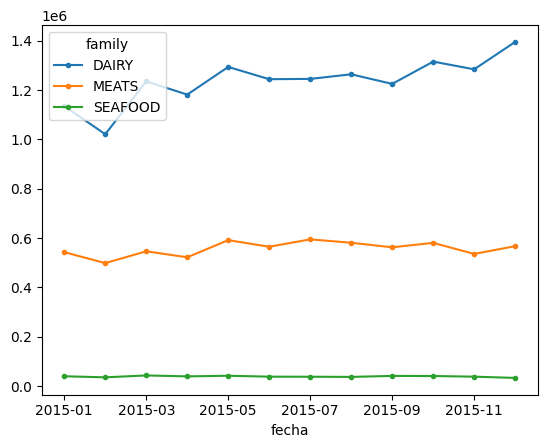

In [28]:
# Grafico de lineas de multiples categorias
pivote.plot.line(
    style='.-'
)

array([<Axes: xlabel='fecha'>, <Axes: xlabel='fecha'>,
       <Axes: xlabel='fecha'>], dtype=object)

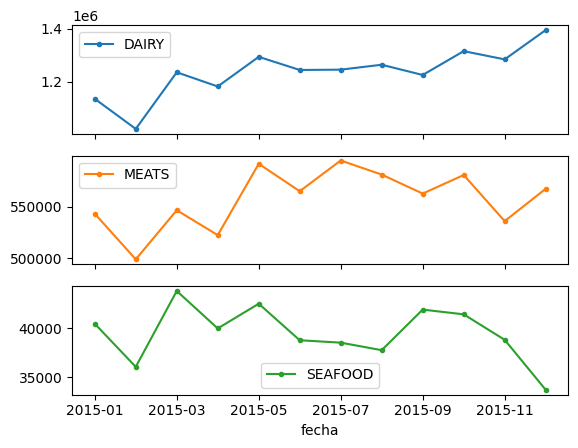

In [29]:
# Grafico de lineas de multiples categorias con Subplots
pivote.plot.line(
    style='.-',
    subplots=True
)

# Gráfico de Area
Combina la utilidad del gráfico de líneas con la del gráfico de barras. Me permite comparar diferencias entre magnitudes y hallar tendencias a lo largo de una progresión continua. Es por esto que en un gráfico de Areas, el Eje Y si tiene que empezar en el "cero" (como el gráfico de baras). Básicamente es un gráfico de líneas con el area bajo la curva de un color sólido.   
**Eje X**: Variable categórica continua   
**Eje Y**: Variable numérica   
**Otros nombres**: Area Chart   
**Subtipos**: a) Stacked Area Chart (Gráfico de Areas Apilados): Multiples líneas que acumulan sus valores numéricos del Eje Y. b) Overlapped Area Chart (Gráfico de Areas Agrupados): Multiples líneas que no acumulan sus valores numéricos del Eje Y.

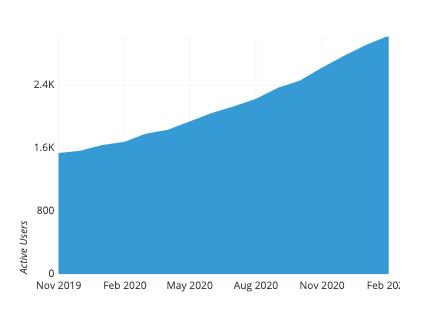

## Referencias
- https://datavizcatalogue.com/ES/metodos/grafica_de_area.html
- https://chartio.com/learn/charts/area-chart-complete-guide/

<Axes: xlabel='fecha'>

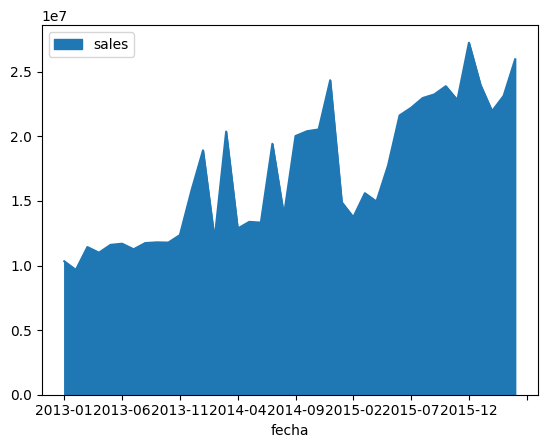

In [30]:
# Grafico de Area Comun
por_mes.plot.area(
    y='sales'
)

<Axes: xlabel='fecha'>

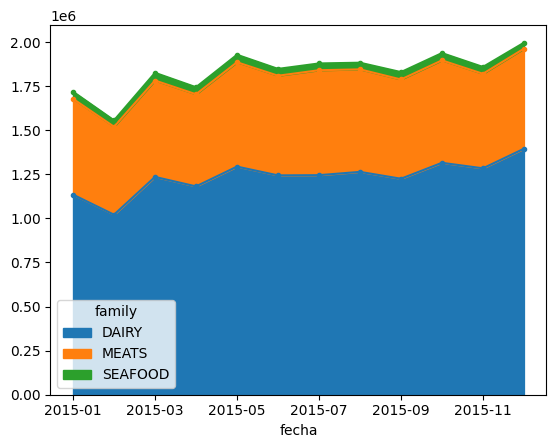

In [31]:
# Grafico de area apilado de multiples categorias
pivote.plot.area(
    style='.-',
    stacked=True
)

<Axes: xlabel='fecha'>

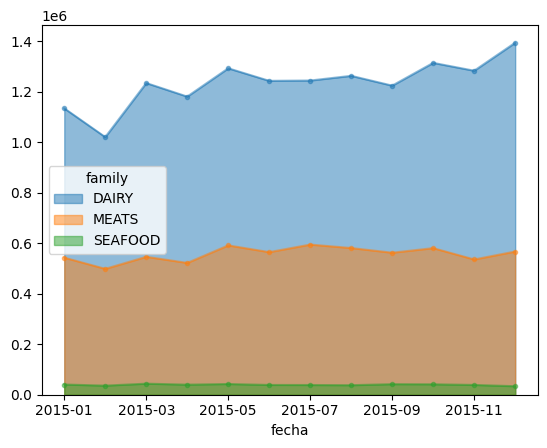

In [32]:
# Grafico de area agrupado de multiples categorias
# El Eje Y no se acumula con cada línea
pivote.plot.area(
    style='.-',
    stacked=False
)